In [1]:
import numpy as np
import pylab as plt

In [2]:
from numpy import convolve
def moving_average_left(x, wl, fl=None):
    x = np.squeeze(x)
    ns = len(x)
    if not fl:
        fl = np.ones(wl)/wl
        
    a_left = convolve(x[::-1], fl, mode='full')[::-1]
    a_left = a_left[:ns]
    
    return a_left

def moving_average_right(x, wr, fr=None):
    x = np.squeeze(x)
    ns = len(x)
    
    if not fr:
        fr = np.ones(wr)/wr
   
    a_right = convolve(x, fr, mode='full')
    a_right = a_right[wr-1:]
    
    return a_right

def moving_average_center(x, w, f=None):
    x = np.squeeze(x)
    ns = len(x)
    
    if not f:
        f = np.ones(w)/w
   
    a_right = convolve(x, fr, mode='same')
    
    return a_right

def stalta(x, sw, lw):
    x = np.squeeze(x)
    short = moving_average_left(x**2, sw)
    long = moving_average_left(x**2, lw)
    det = short/(long + 1e-16)
    det = np.abs(np.gradient(det))
    return det

def mer(x, w):
    x = np.squeeze(x)
    left = moving_average_left(x**2, w)
    right = moving_average_right(x**2, w)
    right[-1:-w:-1] = 1e-16
    left[:w] = 1e-16
    det = right/(left + 1e-16)
    det[:w] = 1
    det[-1:-w:-1] = 1
    det = (np.abs(x) * det)**3
    return det

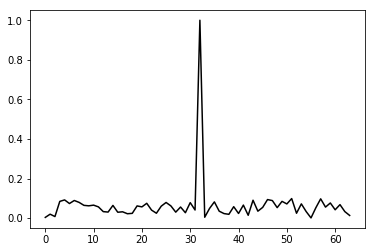

In [3]:
x = np.zeros((64,1))
x += .1*np.random.rand(*x.shape)
x[32] = 1
plt.figure()
plt.plot(x, 'k')
plt.show()

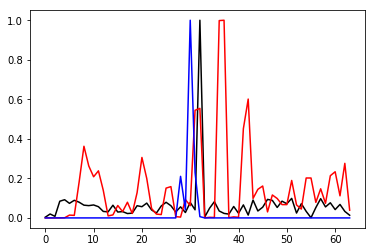

In [4]:
# ws - в 3-5 раз длиннее периода сигнала
# wl - в 7-10 раз длиннее периода сигнала 
# w_mer - в 3-5 раз длиннее периода сигнала

ws, wl = 5, 10
w_mer = 5
f_stalta = stalta(x, ws, wl)
f_mer = mer(x, 5)

plt.plot(x, 'k')
plt.plot(f_stalta/f_stalta.max(), 'r')
plt.plot(f_mer/f_mer.max(), 'b')

plt.show()